In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
# Convert the data to Tensor
transform = transforms.ToTensor()

### Load the CIFAR10 dataset

In [5]:
# Load CIFAR-10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
class Cifar(nn.Module):
    """
    A simple neural network for classifying FashionMNIST Images. The network has 2 fully connected layers with ReLU activation and
    a final layer with 10 output categories.
    """
    def __init__(self, hidden_dim):
        super(CifarNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 *3, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.final_layer = nn.Linear(hidden_dim, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.final_layer(x)
        
        return x

In [7]:
def train_nn(model, train_loader, criterion, optimizer, device):
    """Function to train the neural network for one epoch"""
    model.train()
    running_loss = 0.0
    correct_labels = 0
    total_labels = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted_labels = torch.argmax(outputs, dim=1)
        total_labels += labels.size(0)
        correct_labels += torch.sum(predicted_labels == labels).item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_labels / total_labels
    
    return train_loss, train_accuracy

In [8]:
def evaluate_nn(model, test_loader, criterion, device):
    """
    Function to evaluate the neural network on the test data.
    """
    model.eval()
    running_loss = 0.0
    correct_labels = 0
    total_labels = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            predicted_labels = torch.argmax(outputs, dim=1)
            total_labels += labels.size(0)
            correct_labels += torch.sum(predicted_labels == labels).item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = correct_labels / total_labels
    return test_loss, test_accuracy

In [14]:
def run_training(hidden_dim, lr, num_epochs):
    """
    Function to train and evaluate the model for a given number of epochs.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CifarNN(hidden_dim).to(device)                    # Initialize model
        
    criterion = nn.CrossEntropyLoss()                           # Loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)            # Optimizer

    train_losses = []
    test_losses = []
    
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        train_loss, train_accuracy = train_nn(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = evaluate_nn(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    # Returns the model metrics.
    return model, train_losses, train_accuracies, test_losses, test_accuracies

In [17]:
hidden_dim = 128
lr = 0.001
num_epochs = 12

# Call the model training function
model, train_losses, train_accuracies, test_losses, test_accuracies = run_training(hidden_dim, lr, num_epochs)


  8%|███▋                                        | 1/12 [00:18<03:24, 18.57s/it]

Epoch 1/12
Train Loss: 1.8581, Train Acc: 0.3226
Test Loss: 1.7481, Test Acc: 0.3584


 17%|███████▎                                    | 2/12 [00:39<03:18, 19.82s/it]

Epoch 2/12
Train Loss: 1.7108, Train Acc: 0.3838
Test Loss: 1.6482, Test Acc: 0.4038


 25%|███████████                                 | 3/12 [00:59<03:01, 20.17s/it]

Epoch 3/12
Train Loss: 1.6495, Train Acc: 0.4057
Test Loss: 1.6168, Test Acc: 0.4189


 33%|██████████████▋                             | 4/12 [01:20<02:42, 20.32s/it]

Epoch 4/12
Train Loss: 1.6017, Train Acc: 0.4245
Test Loss: 1.6025, Test Acc: 0.4332


 42%|██████████████████▎                         | 5/12 [01:40<02:22, 20.40s/it]

Epoch 5/12
Train Loss: 1.5760, Train Acc: 0.4320
Test Loss: 1.5563, Test Acc: 0.4461


 50%|██████████████████████                      | 6/12 [02:01<02:02, 20.45s/it]

Epoch 6/12
Train Loss: 1.5553, Train Acc: 0.4416
Test Loss: 1.5333, Test Acc: 0.4563


 58%|█████████████████████████▋                  | 7/12 [02:22<01:42, 20.49s/it]

Epoch 7/12
Train Loss: 1.5413, Train Acc: 0.4438
Test Loss: 1.5783, Test Acc: 0.4316


 67%|█████████████████████████████▎              | 8/12 [02:42<01:22, 20.52s/it]

Epoch 8/12
Train Loss: 1.5300, Train Acc: 0.4523
Test Loss: 1.5470, Test Acc: 0.4427


 75%|█████████████████████████████████           | 9/12 [03:03<01:01, 20.52s/it]

Epoch 9/12
Train Loss: 1.5186, Train Acc: 0.4562
Test Loss: 1.5575, Test Acc: 0.4403


 83%|███████████████████████████████████▊       | 10/12 [03:23<00:41, 20.53s/it]

Epoch 10/12
Train Loss: 1.5105, Train Acc: 0.4583
Test Loss: 1.5500, Test Acc: 0.4449


 92%|███████████████████████████████████████▍   | 11/12 [03:44<00:20, 20.53s/it]

Epoch 11/12
Train Loss: 1.4981, Train Acc: 0.4630
Test Loss: 1.5434, Test Acc: 0.4462


100%|███████████████████████████████████████████| 12/12 [04:04<00:00, 20.40s/it]

Epoch 12/12
Train Loss: 1.4943, Train Acc: 0.4642
Test Loss: 1.5339, Test Acc: 0.4510


In [10]:
# Simple CNN Model
class CNN(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [11]:
def custom_lr_scheduler(optimizer, epoch, init_lr=0.1, warmup_epochs=5, decay_rate=0.5, decay_epochs=10):
    """Custom LR scheduler with warmup and decay"""
    if epoch < warmup_epochs:
        lr = init_lr * (epoch + 1) / warmup_epochs
    else:
        lr = init_lr * (decay_rate ** ((epoch - warmup_epochs) // decay_epochs))
    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

In [15]:
# Training and Evaluation Function
def run_training(hidden_dim, lr, num_epochs, dropout_rate=0.3, weight_decay=1e-4):
    """
    Function to train and evaluate the CNN model for a given number of epochs with custom LR scheduling, dropout, and weight decay.
    """

    # Initialize device and model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNN(dropout_rate=dropout_rate).to(device)

    # Loss function and optimizer with weight decay for L2 regularization
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Lists to store training metrics
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    learning_rates = []  # List to store learning rates for each epoch

    # Training loop with custom LR scheduling
    for epoch in tqdm(range(num_epochs)):
        # Update learning rate using the custom scheduler and store it
        current_lr = custom_lr_scheduler(optimizer, epoch, init_lr=lr)
        learning_rates.append(current_lr)

        # Training step
        train_loss, train_accuracy = train_nn(model, train_loader, criterion, optimizer, device)
        
        # Evaluation step
        test_loss, test_accuracy = evaluate_nn(model, test_loader, criterion, device)

        # Save metrics for analysis
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print epoch summary
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"LR: {current_lr:.6f}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    # Return model and training metrics
    return model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates

In [16]:
# Example of calling the function with parameters
hidden_dim = 128
lr = 0.001
num_epochs = 12
dropout_rate = 0.3
weight_decay = 1e-4

# Call the model training function
model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates = run_training(
    hidden_dim, lr, num_epochs, dropout_rate=dropout_rate, weight_decay=weight_decay
)

  8%|███▋                                        | 1/12 [01:04<11:49, 64.47s/it]

Epoch 1/12
LR: 0.000200, Train Loss: 1.7077, Train Acc: 0.3778
Test Loss: 1.4293, Test Acc: 0.4838


 17%|███████▎                                    | 2/12 [02:37<13:35, 81.54s/it]

Epoch 2/12
LR: 0.000400, Train Loss: 1.4207, Train Acc: 0.4854
Test Loss: 1.1957, Test Acc: 0.5749


 25%|███████████                                 | 3/12 [04:16<13:25, 89.46s/it]

Epoch 3/12
LR: 0.000600, Train Loss: 1.2447, Train Acc: 0.5536
Test Loss: 1.0692, Test Acc: 0.6194


 33%|██████████████▎                            | 4/12 [06:26<14:03, 105.42s/it]

Epoch 4/12
LR: 0.000800, Train Loss: 1.1158, Train Acc: 0.6054
Test Loss: 1.0187, Test Acc: 0.6446


 42%|█████████████████▉                         | 5/12 [08:26<12:54, 110.57s/it]

Epoch 5/12
LR: 0.001000, Train Loss: 1.0309, Train Acc: 0.6365
Test Loss: 0.9810, Test Acc: 0.6582


 50%|██████████████████████                      | 6/12 [09:34<09:37, 96.28s/it]

Epoch 6/12
LR: 0.001000, Train Loss: 0.9409, Train Acc: 0.6672
Test Loss: 0.9333, Test Acc: 0.6748


 58%|█████████████████████████▋                  | 7/12 [10:59<07:42, 92.44s/it]

Epoch 7/12
LR: 0.001000, Train Loss: 0.8675, Train Acc: 0.6948
Test Loss: 0.8821, Test Acc: 0.6979


 67%|█████████████████████████████▎              | 8/12 [12:25<06:01, 90.28s/it]

Epoch 8/12
LR: 0.001000, Train Loss: 0.8029, Train Acc: 0.7166
Test Loss: 0.8571, Test Acc: 0.7021


 75%|█████████████████████████████████           | 9/12 [14:17<04:51, 97.30s/it]

Epoch 9/12
LR: 0.001000, Train Loss: 0.7450, Train Acc: 0.7374
Test Loss: 0.8676, Test Acc: 0.7027


 83%|███████████████████████████████████       | 10/12 [16:12<03:25, 102.53s/it]

Epoch 10/12
LR: 0.001000, Train Loss: 0.6984, Train Acc: 0.7531
Test Loss: 0.8681, Test Acc: 0.7106


 92%|██████████████████████████████████████▌   | 11/12 [17:48<01:40, 100.62s/it]

Epoch 11/12
LR: 0.001000, Train Loss: 0.6512, Train Acc: 0.7692
Test Loss: 0.8503, Test Acc: 0.7122


100%|███████████████████████████████████████████| 12/12 [19:42<00:00, 98.55s/it]

Epoch 12/12
LR: 0.001000, Train Loss: 0.6135, Train Acc: 0.7809
Test Loss: 0.8695, Test Acc: 0.7116


### Plot metric curves

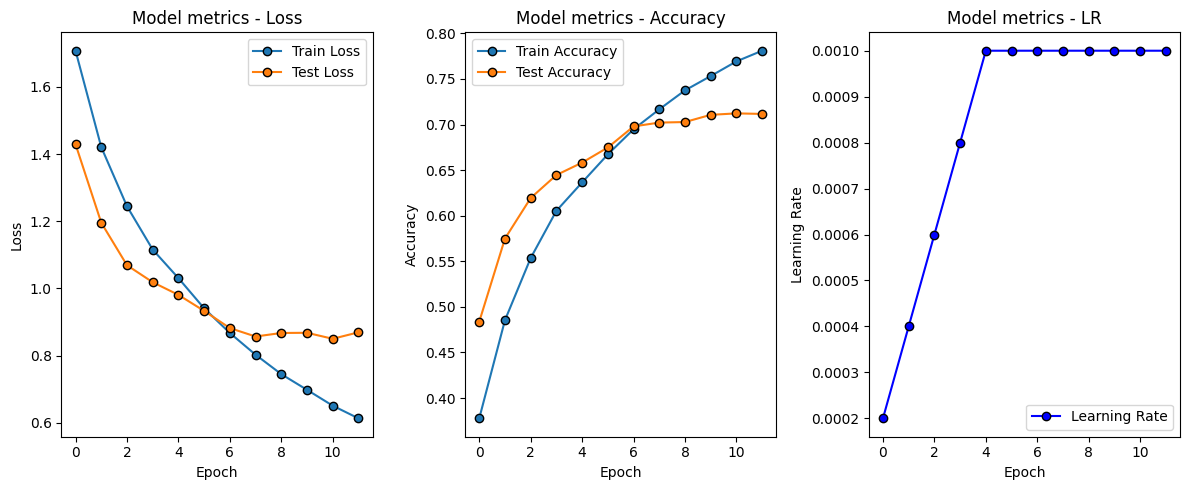

In [23]:
# plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(learning_rates, label='Learning Rate', marker='o', markeredgecolor='black', color='blue')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Model metrics - LR')
plt.tight_layout()

plt.show()

### Without dropuout and weight decay

In [24]:
dropout_rate = 0.0
weight_decay = 0
model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates = run_training(
    hidden_dim, lr, num_epochs, dropout_rate=dropout_rate, weight_decay=weight_decay
)

  8%|████████████▎                                                                                                                                       | 1/12 [00:58<10:44, 58.57s/it]

Epoch 1/12
LR: 0.000200, Train Loss: 1.5900, Train Acc: 0.4331
Test Loss: 1.3703, Test Acc: 0.5099


 17%|████████████████████████▋                                                                                                                           | 2/12 [02:22<12:13, 73.34s/it]

Epoch 2/12
LR: 0.000400, Train Loss: 1.2691, Train Acc: 0.5494
Test Loss: 1.1456, Test Acc: 0.5929


 25%|█████████████████████████████████████                                                                                                               | 3/12 [03:39<11:17, 75.24s/it]

Epoch 3/12
LR: 0.000600, Train Loss: 1.0833, Train Acc: 0.6215
Test Loss: 1.0120, Test Acc: 0.6451


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [04:56<10:06, 75.78s/it]

Epoch 4/12
LR: 0.000800, Train Loss: 0.9472, Train Acc: 0.6683
Test Loss: 0.9068, Test Acc: 0.6837


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [06:09<08:42, 74.70s/it]

Epoch 5/12
LR: 0.001000, Train Loss: 0.8509, Train Acc: 0.7002
Test Loss: 0.9380, Test Acc: 0.6768


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [07:15<07:11, 71.91s/it]

Epoch 6/12
LR: 0.001000, Train Loss: 0.7397, Train Acc: 0.7396
Test Loss: 0.9017, Test Acc: 0.6953


 58%|██████████████████████████████████████████████████████████████████████████████████████▎                                                             | 7/12 [08:27<05:59, 71.88s/it]

Epoch 7/12
LR: 0.001000, Train Loss: 0.6380, Train Acc: 0.7767
Test Loss: 0.8733, Test Acc: 0.7050


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 8/12 [09:18<04:20, 65.19s/it]

Epoch 8/12
LR: 0.001000, Train Loss: 0.5373, Train Acc: 0.8110
Test Loss: 0.9418, Test Acc: 0.7000


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 9/12 [10:16<03:08, 62.94s/it]

Epoch 9/12
LR: 0.001000, Train Loss: 0.4546, Train Acc: 0.8403
Test Loss: 1.0407, Test Acc: 0.6988


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 10/12 [11:33<02:14, 67.33s/it]

Epoch 10/12
LR: 0.001000, Train Loss: 0.3816, Train Acc: 0.8649
Test Loss: 1.0675, Test Acc: 0.7097


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 11/12 [12:49<01:09, 69.90s/it]

Epoch 11/12
LR: 0.001000, Train Loss: 0.3181, Train Acc: 0.8864
Test Loss: 1.1036, Test Acc: 0.7027


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [14:05<00:00, 70.43s/it]

Epoch 12/12
LR: 0.001000, Train Loss: 0.2662, Train Acc: 0.9051
Test Loss: 1.2695, Test Acc: 0.6973


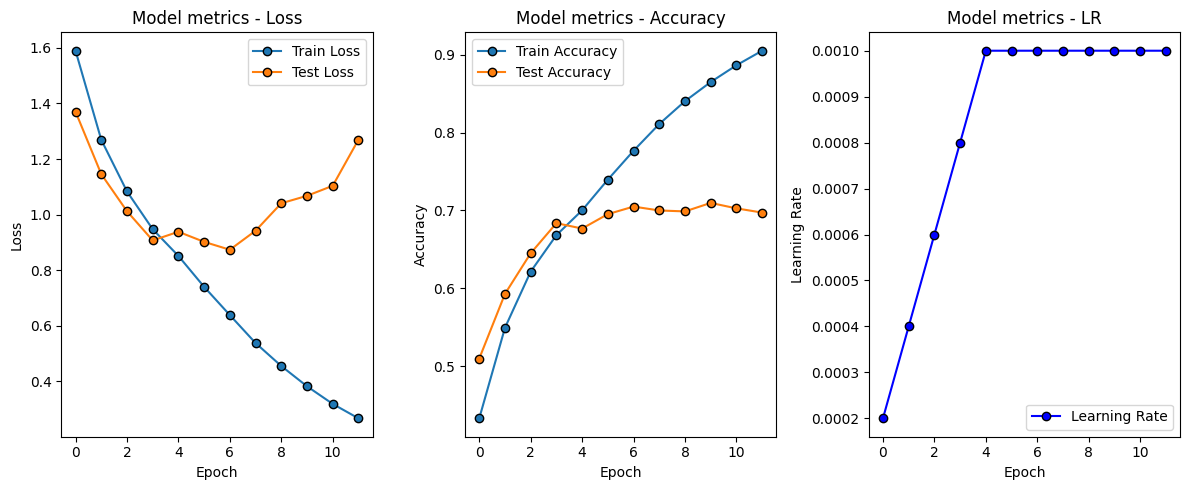

In [25]:
# plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(learning_rates, label='Learning Rate', marker='o', markeredgecolor='black', color='blue')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Model metrics - LR')
plt.tight_layout()

plt.show()

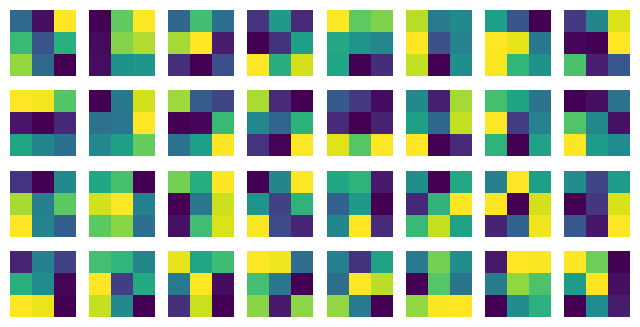

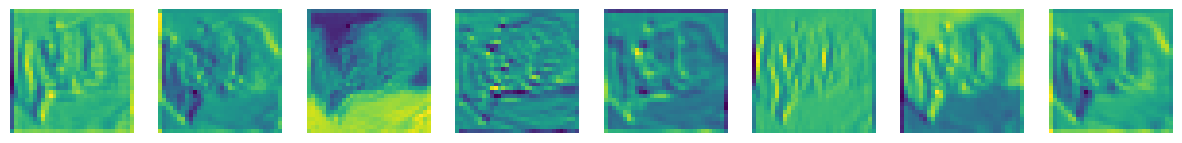

In [77]:
# Function to visualize convolutional kernels (weights)
def visualize_kernels(layer):
    kernels = layer.weight.data.cpu().numpy()
    fig, axs = plt.subplots(4, 8, figsize=(8, 4))
    for i, ax in enumerate(axs.flat):
        if i < kernels.shape[0]:
            ax.imshow(kernels[i, 0, :, :])
            ax.axis('off')
    plt.show()

# Function to visualize feature maps
def visualize_feature_maps(model, images):
    x = images.to('cpu')
    for name, layer in model.named_children():
        x = layer(x)
        if isinstance(layer, nn.Conv2d):
            plt.figure(figsize=(15, 15))
            feature_maps = x[0].detach().cpu().numpy()
            for i in range(8):  # Display first 8 feature maps
                plt.subplot(1, 8, i + 1)
                plt.imshow(feature_maps[i])
                plt.axis('off')
            plt.show()
            break  # Visualize first conv layer only

# Visualize CNN convolutional kernels and feature maps
visualize_kernels(model.conv1)
data_iter = iter(test_loader)
images, _ = next(data_iter)
visualize_feature_maps(model, images)

In [30]:
model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

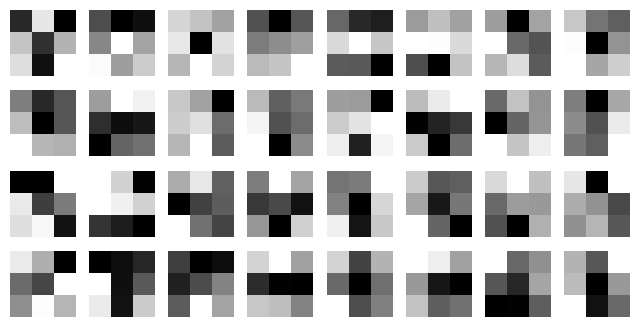

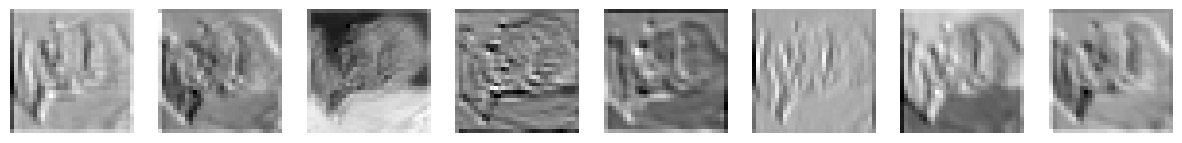

In [34]:
visualize_kernels(model.conv2)
data_iter = iter(test_loader)
images, _ = next(data_iter)
visualize_feature_maps(model, images)

In [40]:
# Visualize weights of convolutional layers
def visualize_kernels(model):
    conv_layers = [layer for layer in model.modules() if isinstance(layer, nn.Conv2d)]
    for i, conv in enumerate(conv_layers):
        weights = conv.weight.data.cpu()
        num_kernels = weights.shape[0]
        
        # Plot up to 6 filters for each layer
        fig, axes = plt.subplots(1, min(num_kernels, 6), figsize=(12, 6))
        fig.suptitle(f"Conv Layer {i+1} Kernels")
        
        for j in range(min(num_kernels, 6)):
            # Select the first channel (e.g., RGB - channel 0) to visualize as grayscale
            ax = axes[j]
            ax.imshow(weights[j, 0].squeeze(), cmap="gray")
            ax.axis("off")
        plt.show()

# Hook to capture activations
def get_activation(name, activations_dict):
    def hook(model, input, output):
        activations_dict[name] = output.detach()
    return hook

# Visualize activations (feature maps)
def visualize_activations(model, input_image):
    conv_layers = [layer for layer in model.modules() if isinstance(layer, nn.Conv2d)]
    activations_dict = {}
    
    # Register hooks to capture activations
    for i, layer in enumerate(conv_layers):
        layer.register_forward_hook(get_activation(f'conv{i+1}', activations_dict))
    
    # Forward pass to trigger hooks and get activations
    model(input_image)

    for name, activation in activations_dict.items():
        num_feature_maps = activation.shape[1]
        
        fig, axes = plt.subplots(1, min(num_feature_maps, 6), figsize=(12, 6))
        fig.suptitle(f"Activations from {name}")
        
        for i in range(min(num_feature_maps, 6)):  # Visualize up to 6 feature maps
            ax = axes[i]
            ax.imshow(activation[0, i].cpu(), cmap="viridis")
            ax.axis("off")
        plt.show()


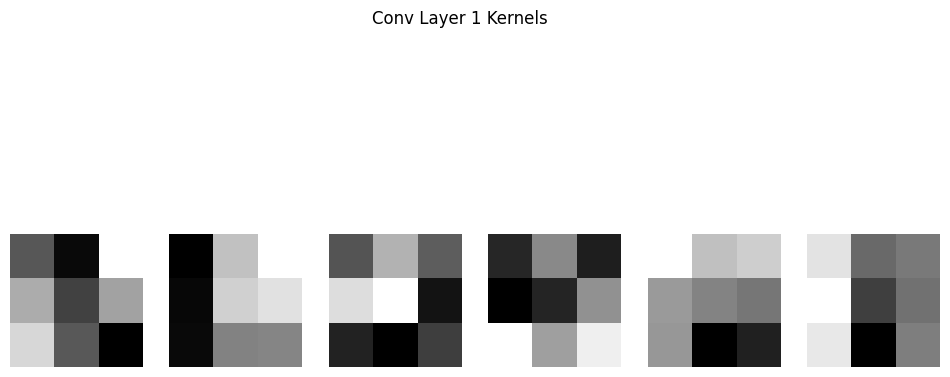

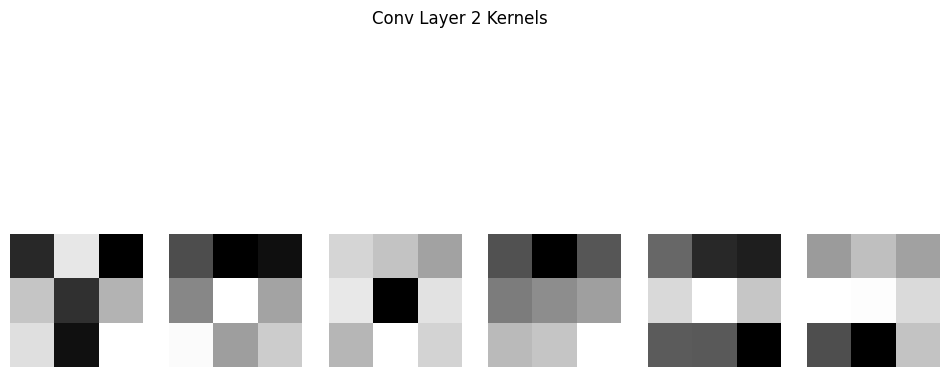

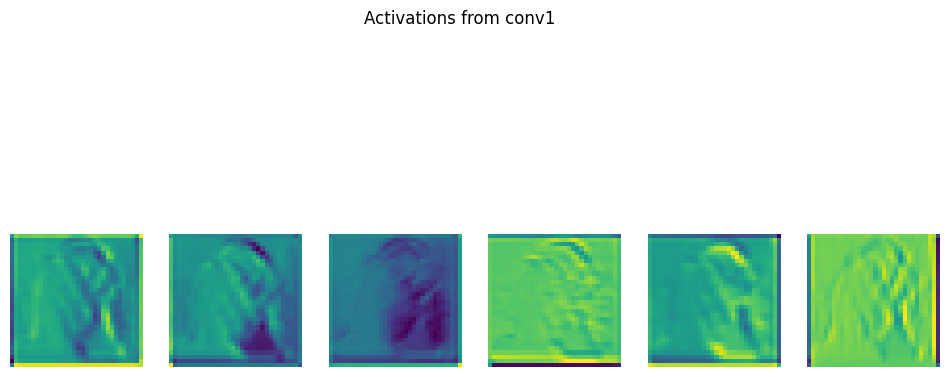

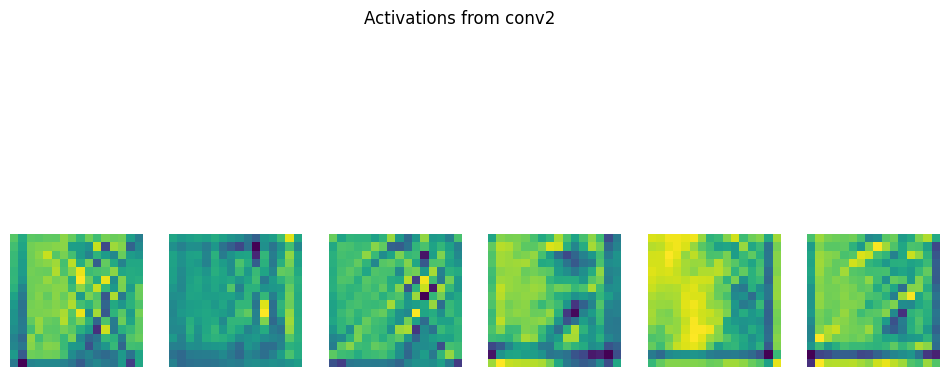

In [41]:
# Usage with an example
# Assuming `model` is an instance of your CNN and `sample_image` is a single image from your dataset
sample_image, _ = next(iter(train_loader))  # Get a batch of images
sample_image = sample_image[0].unsqueeze(0).to(next(model.parameters()).device)  # Select one image and add batch dimension

# Visualize convolutional kernels (weights)
visualize_kernels(model)

# Visualize feature maps (activations)
visualize_activations(model, sample_image)

In [46]:
from torchvision import utils

In [47]:
https://stackoverflow.com/questions/55594969/how-to-visualise-filters-in-a-cnn-with-pytorch
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

In [50]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    """
    Visualizes tensor as an image grid. Can display all kernels or a specific channel.
    
    Args:
        tensor (torch.Tensor): The input tensor to visualize, assumed to be of shape (n, c, w, h).
        ch (int): Specific channel to display if `allkernels` is False.
        allkernels (bool): If True, visualizes all channels. If False, visualizes the specified channel.
        nrow (int): Number of images in each row of the grid.
        padding (int): Padding between images in the grid.
    """
    n, c, w, h = tensor.shape

    # If allkernels is True, flatten all channels
    if allkernels:
        tensor = tensor.view(n * c, -1, w, h)
    elif c != 3:
        tensor = tensor[:, ch, :, :].unsqueeze(dim=1)  # Select only one channel if not RGB

    # Determine the number of rows for the plot
    rows = np.min((tensor.shape[0] // nrow + 1, 64))

    # Create grid
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    
    # Plot grid
    plt.figure(figsize=(nrow, rows))
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))
    plt.axis("off")
    plt.show()

In [69]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    """
    Visualizes tensor as an image grid. Can display all kernels or a specific channel.
    
    Args:
        tensor (torch.Tensor): The input tensor to visualize, assumed to be of shape (n, c, w, h).
        ch (int): Specific channel to display if `allkernels` is False.
        allkernels (bool): If True, visualizes all channels. If False, visualizes the specified channel.
        nrow (int): Number of images in each row of the grid.
        padding (int): Padding between images in the grid.
    """
    n, c, w, h = tensor.shape

    # If allkernels is True, flatten all channels except RGB (c == 3)
    if allkernels and c != 3:
        tensor = tensor.view(n * c, -1, w, h)
    elif c != 3:
        tensor = tensor[:, ch, :, :].unsqueeze(dim=1)  # Select only one channel if not RGB

    # Determine the number of rows for the plot
    rows = np.min((tensor.shape[0] // nrow + 1, 64))

    # Create grid
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    
    # Plot grid (for RGB, we keep it as is; for grayscale, plt handles single-channel display)
    plt.figure(figsize=(nrow, rows))
    if c == 3:
        plt.imshow(grid.permute(1, 2, 0).cpu().numpy())  # RGB
    else:
        plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)), cmap="gray")  # Grayscale for single channel
    plt.axis("off")
    plt.show()

In [70]:
layer = 1
filter = model.features[layer].weight.data.clone()
visTensor(filter, ch=0, allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

AttributeError: 'CNN' object has no attribute 'features'

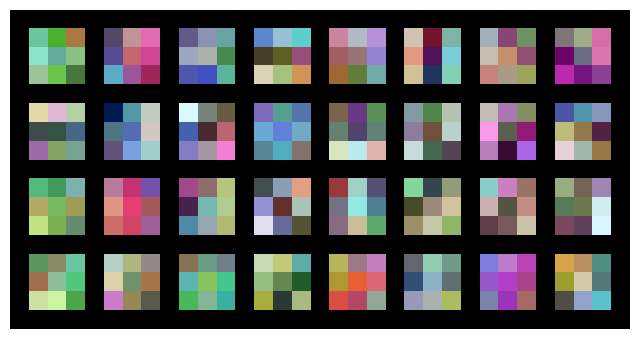

In [73]:
visTensor(model.conv1.weight.data, allkernels=True, nrow=8)

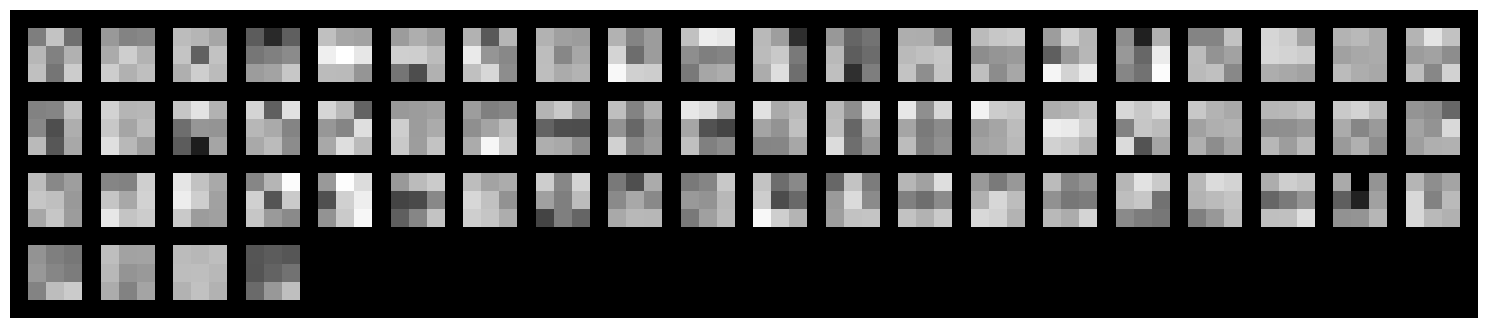

In [74]:
visTensor(model.conv2.weight.data, allkernels=False, nrow=20)